# Basic Computer Vision

This jupyter notebook contains the first two exercises about basic principles in computer vision. Solve them by filling in the ToDo's with your implementation.

In [7]:
# needed imports and configuration for matplotlib

import cv2
import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity
import numpy as np
import itertools
import math
%matplotlib inline

In [8]:
# some utility functions to draw the images using matplotlib
def showBGR(imgBGR):
    plt.figure(figsize=(12,8))
    plt.imshow(cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB))
    
def showGray(image):
    plt.figure(figsize=(12,8))
    plt.imshow(image,cmap=plt.cm.gray)

## Exercise 1: Convolution without OpenCV

The convolution of an image and a convolution mask (kernel) can be used as linear filter for a myriad of applications in computer vision. Depending on the structure of a kernel, we can use it to blur or sharpen the image, extract edges and many more. The convolution can be described using the following equation:

$ F(x,y) =  f(x,y) \otimes  g(x,y) = \sum_{s=-a}^{a} \sum_{t=-b}^{b} f(s,t)g(x-s, y-t) $

In this exercise, you will implement your the convolution in the cell below and apply different kernels to filter your input image. Compare your results with the one computed by the OpenCV implementation two cells below.

The following steps serve as a support in case you are not sure where to start:

   1. create a padded version of your input image where the border region reflects the first/last value of the vector along the axis (Thus, a column abc with a padding of two will become aaabccc)
   2. compute the convolution between the kernel and the image. Use the center point of the kernel as the anchor point.
   3. rescale the intensity, so that you will end up with an uint8 image. You can use the rescale_intensity function of skimage.exposure to accomplish this task.
   4. return the uint8 version of your convolved image.
    
During the whole process, be aware that numpy won't prevent you from any overflow encountered during the operation!



In [18]:
# werte < 0 rausschmeissen

def get_array_neighbors(array, x, y, padding_size):
    a = []
    a.append(array[y-padding_size][x-1:x+padding_size+1])
    a.append(array[y][x-1:x+padding_size+1])
    a.append(array[y+padding_size][x-1:x+padding_size+1])
    return np.asarray(a)

def createImagePadding(image, padding_size):
    return np.pad(image, padding_size, mode="edge")
    
def convolve2d(image, kernel):
    padding_size = math.floor(kernel.shape[0] / 2)
    image = createImagePadding(image, padding_size)
    #print(get_array_neighbors(image, 1, 1, padding_size))
    
    print(np.dot(kernel, get_array_neighbors(image, 1, 1, padding_size)).sum())
    
    output_image = []
    
    for y in range(padding_size, image.shape[0] - padding_size):
        row = []
        for x in range(padding_size, image.shape[1] - padding_size):
            row.append(np.dot(kernel, get_array_neighbors(image, x, y, padding_size)).sum())
            #print(np.dot(kernel, get_array_neighbors(image, x, y, padding_size)).sum())
        output_image.append(row)
        
    return np.array(output_image)


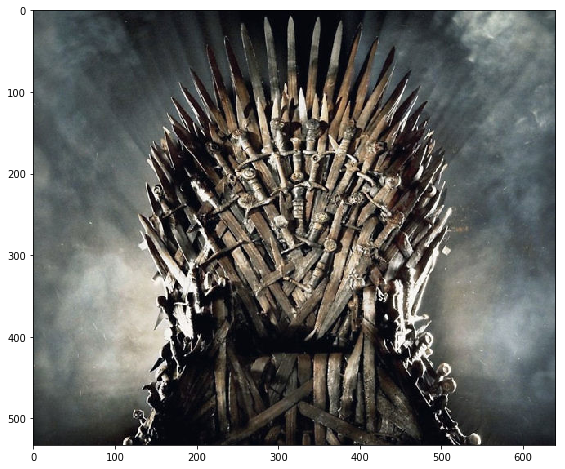

In [10]:
inputImage = cv2.imread("resources/got.jpg", cv2.IMREAD_COLOR)
showBGR(inputImage)

This cell calls your implementation of the convolution and compares the result to the one computed by `cv2.filter2D`. Feel free to change the kernel and see how it affect the image of the  Iron Throne. Use the following page as a reference for different kernel types: http://setosa.io/ev/image-kernels/

32


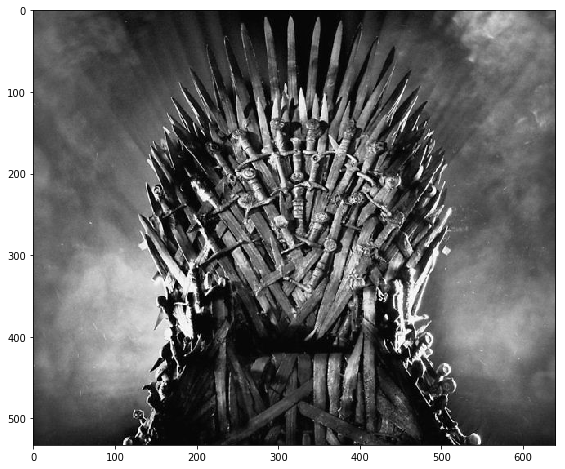

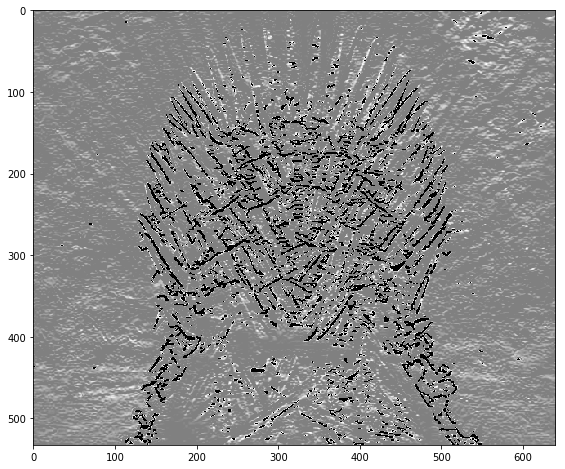

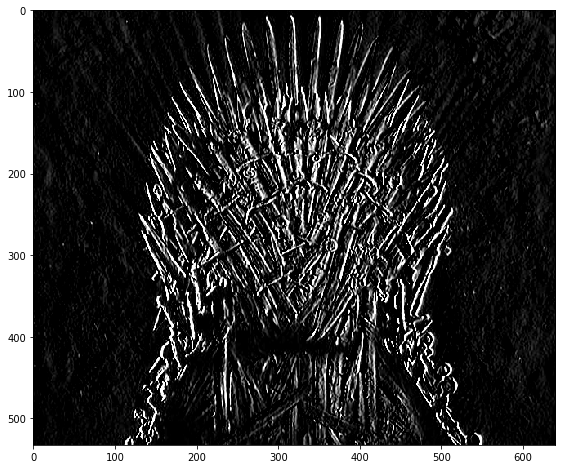

In [19]:
grayImage = cv2.cvtColor(inputImage, cv2.COLOR_BGR2GRAY)
k = np.array([1, 0, -1, 2, 0, -2, 1, 0, -1]).reshape(3,3)

ownConv = convolve2d(grayImage, k)
ocvConv = cv2.filter2D(grayImage, -1, k)

showBGR(grayImage)

#print(ownConv)

ownConv = rescale_intensity(ownConv, in_range=(0,255))

#assert(np.allclose(ownConv, ocvConv, rtol=1e-05))
showGray(ownConv)
showGray(ocvConv)

## Exercise 2: Classification of Tetris pieces with OpenCV

You do not necessarily need deep learning for any classification task. Sometimes, the basics of computer vision are just enough to distinguish different objects. This holds true for the following task, which requires you to classify the different tetris pieces based on their shape. Use contour properties to accomplish this task. Your solution should contain at least the following steps:
   1. create a smoothed grayscale image from the input image
   2. threshold the grayscale image. Choose a good threshold to seperate the pieces from the white background
   3. extract the contours from the image using OpenCV
   4. Compute different contour properties, e.g. area of the object, aspect ratio, extent, convecHull/hullArea, solidity, ... Use the following as a reference: https://docs.opencv.org/4.0.1/d3/d05/tutorial_py_table_of_contents_contours.html
   5. try to distinguish the different Block types (which are **Square**, **Rectangle**, **L-Piece**, **Z-Piece** and **T-Piece**)
   6. Print the computed contour properties and the resulting classification result out
   7. Draw the contour and the classification on a copy of the input display your results. 
   
Use the wohle OpenCV Documentation as a reference. It contains a nicely structured Python tutorial which can be found here: https://docs.opencv.org/4.0.1/d6/d00/tutorial_py_root.html

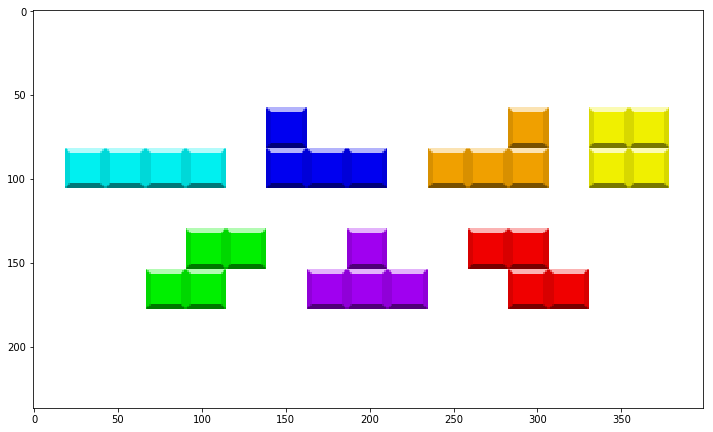

In [32]:
# read and display source image 
tetris = cv2.imread("resources/tetris.png", cv2.IMREAD_COLOR)
showBGR(tetris)

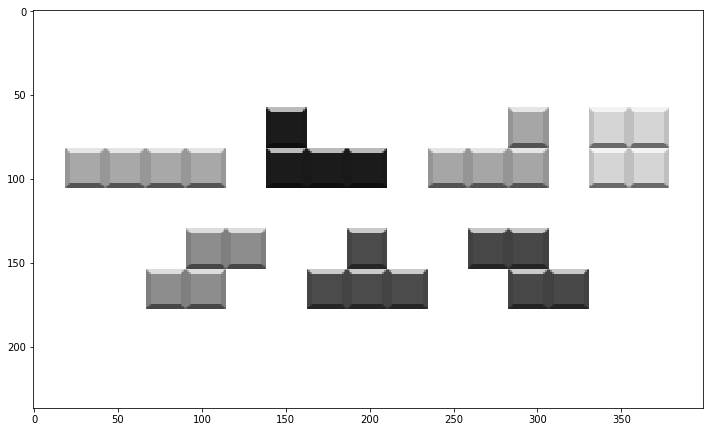

In [33]:
# create smoothed grayscale image
grayImage = cv2.cvtColor(tetris, cv2.COLOR_BGR2GRAY)
showBGR(grayImage)

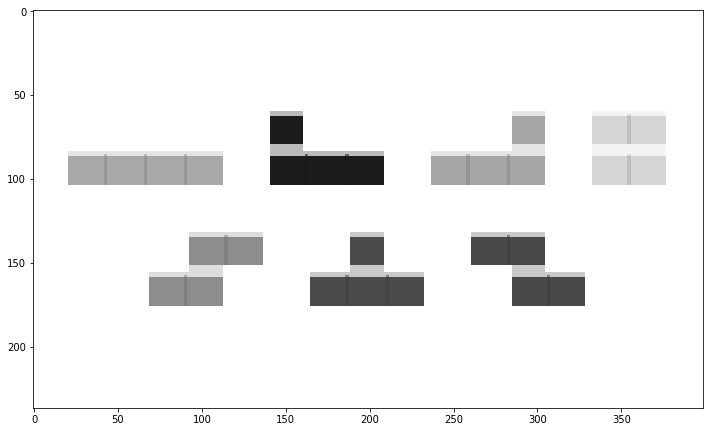

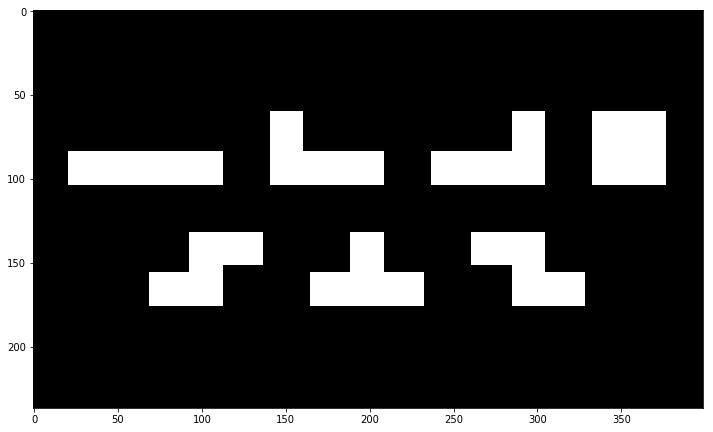

In [55]:
# remove noise in the thresholded image
kernel = np.ones((5,5))
imgDilation = cv2.dilate(grayImage,kernel,iterations = 1)
showBGR(imgDilation)

ret, thresh = cv2.threshold(imgDilation, 254, 255, cv2.THRESH_BINARY_INV)
showBGR(thresh)
#import sys
#np.set_printoptions(threshold=sys.maxsize)
#thresh

In [66]:
# find external contours in the thresholded image and allocate memory
# for the convex hull image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
hullImage = np.zeros(grayImage.shape[:2], dtype="uint8")

print(len(contours))

7


1.5454545454545454
0.7505422993492408

1.5454545454545454
0.7505422993492408

1.5454545454545454
0.7505422993492408

4.6
1.0

1.0
1.0

1.5454545454545454
0.7503253796095445

1.5454545454545454
0.7503253796095445



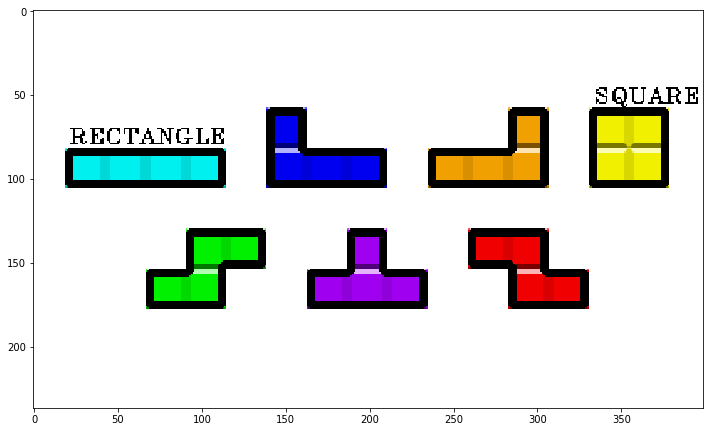

In [76]:
drawImage = tetris.copy()
# loop over the contours
for (i, c) in enumerate(contours):
    # Todo: compute properties for each contour
    
    area = cv2.contourArea(c)
    x,y,w,h = cv2.boundingRect(c)
    aspect_ratio = float(w) / h
    
    
    hull = cv2.convexHull(c)
    hull_area = cv2.contourArea(hull)
    solidity = float(area)/hull_area
    
    print(aspect_ratio)
    print(solidity)
    
    cv2.drawContours(drawImage, [c], -1, (0, 0, 0), 3)
    shape = ""
    
    #ToDo: Use your computed contours to distinguish between the different block types.
    if aspect_ratio == 1:
        shape = "SQUARE"
    elif aspect_ratio == 4.6:
        shape = "RECTANGLE"
    elif aspect_ratio == 1: #TODO
        shape = "T-PIECE"
    elif aspect_ratio == 1: #TODO
        shape = "L-PIECE"
    elif aspect_ratio == 1: #TODO
        shape = "Z-PIECE"
        
    # draw the shape name on the image
    cv2.putText(drawImage, shape, (x, y - 5), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.7,
        (0, 0, 0), 1)
 
    # show the contour properties
    # ToDo: print all your properties and your classification result
    print()
    
# show the output image
showBGR(drawImage)